In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Library Modelling
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
path = '/content/kc_house_3_features.csv'
df = pd.read_csv(path)
df.head()

,sqft_living,sqft_living15,sqft_above,price
0,1180,1340,1180,221900.0
1,2570,1690,2170,538000.0
2,770,2720,770,180000.0
3,1960,1360,1050,604000.0
4,1680,1800,1680,510000.0


In [ ]:
# cm = df.corr()
# sns.heatmap(cm, annot=True)
# plt.show()

In [ ]:
# plt.figure(figsize=(8,8))
# sns.pairplot(df, kind='reg', diag_kind='kde', corner=True)
# plt.show()

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 3) (25, 3) (75,) (25,)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

las = Lasso(alpha=.01)
las.fit(X_train, y_train)

rid = Ridge(alpha=.01)
rid.fit(X_train, y_train)

svr = SVR()
svr.fit(X_train, y_train)

dt = DecisionTreeRegressor( max_depth=6, random_state=34)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=34)

In [ ]:
model = ['lr','las','rid','svr','dt']

mae = []
mae.append(mean_absolute_error(lr.predict(X_train), y_train))
mae.append(mean_absolute_error(las.predict(X_train), y_train))
mae.append(mean_absolute_error(rid.predict(X_train), y_train))
mae.append(mean_absolute_error(svr.predict(X_train), y_train))
mae.append(mean_absolute_error(dt.predict(X_train), y_train))

mse = []
mse.append(mean_squared_error(lr.predict(X_train), y_train))
mse.append(mean_squared_error(las.predict(X_train), y_train))
mse.append(mean_squared_error(rid.predict(X_train), y_train))
mse.append(mean_squared_error(svr.predict(X_train), y_train))
mse.append(mean_squared_error(dt.predict(X_train), y_train))

r2 = []
r2.append(r2_score(lr.predict(X_train), y_train))
r2.append(r2_score(las.predict(X_train), y_train))
r2.append(r2_score(rid.predict(X_train), y_train))
r2.append(r2_score(svr.predict(X_train), y_train))
r2.append(r2_score(dt.predict(X_train), y_train))

metrics_train = pd.DataFrame({'Model' : model, 'MAE_train' : mae, 'MSE_train' : mse, 'R^2_train' : r2})
metrics_train

,Model,MAE_train,MSE_train,R^2_train
0,lr,162507.754031,4.555518e+10,1.329734e-01
1,las,162507.754026,4.555518e+10,1.329734e-01
2,rid,162507.754017,4.555518e+10,1.329734e-01
3,svr,219065.857159,1.063341e+11,-1.814780e+09
4,dt,42755.941587,4.944186e+09,9.469239e-01


In [ ]:
mae = []
mae.append(mean_absolute_error(lr.predict(X_test), y_test))
mae.append(mean_absolute_error(las.predict(X_test), y_test))
mae.append(mean_absolute_error(rid.predict(X_test), y_test))
mae.append(mean_absolute_error(svr.predict(X_test), y_test))
mae.append(mean_absolute_error(dt.predict(X_test), y_test))

mse = []
mse.append(mean_squared_error(lr.predict(X_test), y_test))
mse.append(mean_squared_error(las.predict(X_test), y_test))
mse.append(mean_squared_error(rid.predict(X_test), y_test))
mse.append(mean_squared_error(svr.predict(X_test), y_test))
mse.append(mean_squared_error(dt.predict(X_test), y_test))

r2 = []
r2.append(r2_score(lr.predict(X_test), y_test))
r2.append(r2_score(las.predict(X_test), y_test))
r2.append(r2_score(rid.predict(X_test), y_test))
r2.append(r2_score(svr.predict(X_test), y_test))
r2.append(r2_score(dt.predict(X_test), y_test))

metrics_test = pd.DataFrame({'Model' : model, 'MAE_test' : mae, 'MSE_test' : mse, 'R^2_test' : r2})
metrics_test

,Model,MAE_test,MSE_test,R^2_test
0,lr,186660.957349,5.358070e+10,-1.817023e-01
1,las,186660.957353,5.358070e+10,-1.817023e-01
2,rid,186660.957340,5.358070e+10,-1.817023e-01
3,svr,217340.563071,8.361469e+10,-1.532270e+09
4,dt,208778.050476,6.386842e+10,-1.817239e-02


In [ ]:
metrics = metrics_train.merge(metrics_test, on='Model')
metrics = metrics[['Model', 'MAE_train', 'MAE_test', 'MSE_train', 'MSE_test', 'R^2_train','R^2_test']]
metrics

,Model,MAE_train,MAE_test,MSE_train,MSE_test,R^2_train,R^2_test
0,lr,162507.754031,186660.957349,4.555518e+10,5.358070e+10,1.329734e-01,-1.817023e-01
1,las,162507.754026,186660.957353,4.555518e+10,5.358070e+10,1.329734e-01,-1.817023e-01
2,rid,162507.754017,186660.957340,4.555518e+10,5.358070e+10,1.329734e-01,-1.817023e-01
3,svr,219065.857159,217340.563071,1.063341e+11,8.361469e+10,-1.814780e+09,-1.532270e+09
4,dt,42755.941587,208778.050476,4.944186e+09,6.386842e+10,9.469239e-01,-1.817239e-02


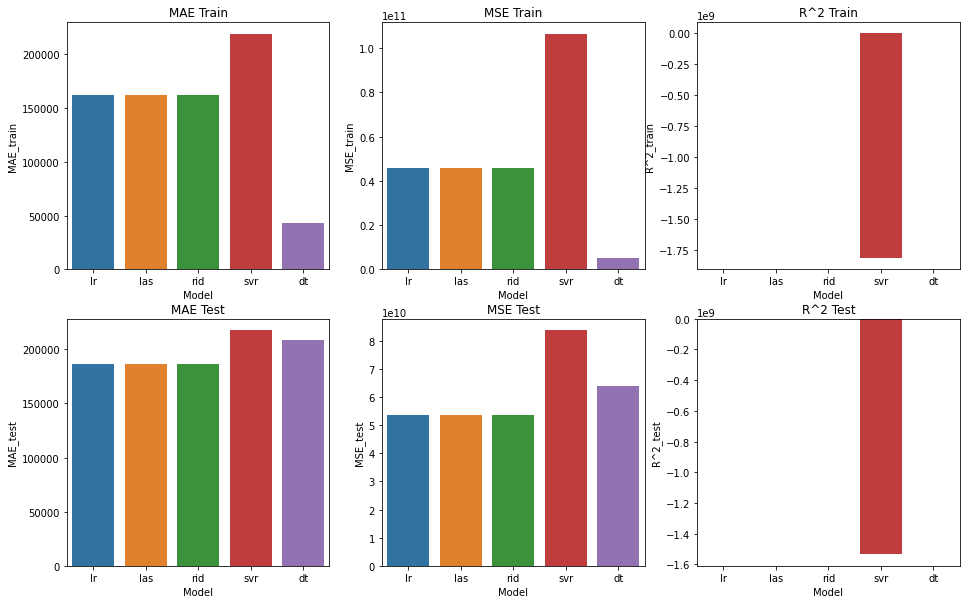

In [ ]:
plt.figure(figsize=(16,10))
plt.subplot(231)
plt.title('MAE Train')
sns.barplot(x=metrics.Model, y=metrics.MAE_train)

plt.subplot(234)
plt.title('MAE Test')
sns.barplot(x=metrics.Model, y=metrics.MAE_test)

plt.subplot(232)
plt.title('MSE Train')
sns.barplot(x=metrics.Model, y=metrics.MSE_train)

plt.subplot(235)
plt.title('MSE Test')
sns.barplot(x=metrics.Model, y=metrics.MSE_test)

plt.subplot(233)
plt.title('R^2 Train')
sns.barplot(x=metrics.Model, y=metrics['R^2_train'])

plt.subplot(236)
plt.title('R^2 Test')
sns.barplot(x=metrics.Model, y=metrics['R^2_test'])
plt.show()

[]

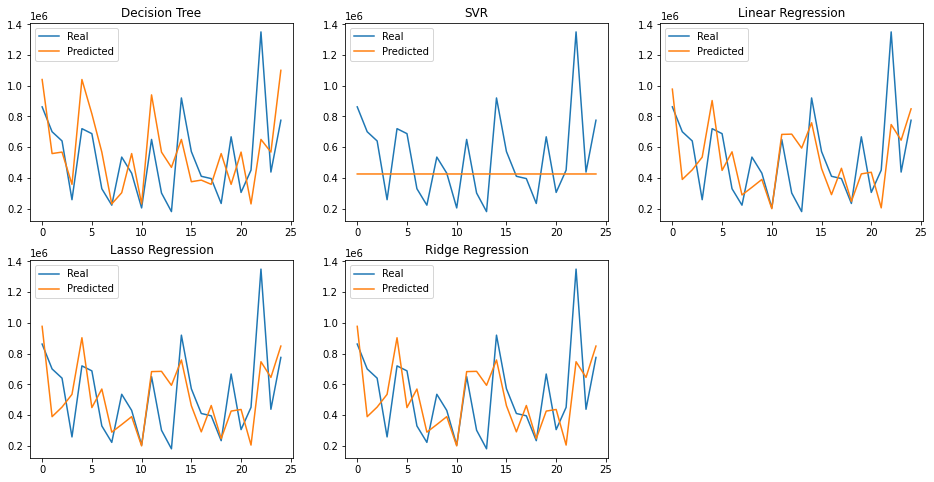

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(231)
plt.title('Decision Tree')
plt.plot(y_test.values)
plt.plot(dt.predict(X_test))
plt.legend(labels=['Real','Predicted'])

plt.subplot(232)
plt.title('SVR')
plt.plot(y_test.values)
plt.plot(svr.predict(X_test))
plt.legend(labels=['Real','Predicted'])

plt.subplot(233)
plt.title('Linear Regression')
plt.plot(y_test.values)
plt.plot(lr.predict(X_test))
plt.legend(labels=['Real','Predicted'])

plt.subplot(234)
plt.title('Lasso Regression')
plt.plot(y_test.values)
plt.plot(las.predict(X_test))
plt.legend(labels=['Real','Predicted'])

plt.subplot(235)
plt.title('Ridge Regression')
plt.plot(y_test.values)
plt.plot(rid.predict(X_test))
plt.legend(labels=['Real','Predicted'])

plt.plot()

In [ ]:
dt.score(X,y)

0.78565886430977

In [ ]:
dt.score(X_train, y_train), dt.score(X_test, y_test)

(0.9495990220285911, 0.12207144326558084)

In [ ]:
pd.DataFrame({'Real' : y_train, 'Predictec' : dt.predict(X_train)})

,Real,Predictec
18,189000.0,2.300190e+05
87,461000.0,3.745417e+05
40,625000.0,5.675000e+05
91,1099880.0,1.099880e+06
67,287000.0,2.881667e+05
...,...,...
65,317625.0,3.745417e+05
80,390000.0,5.675000e+05
12,310000.0,3.574286e+05
35,696000.0,8.165000e+05
